In [1]:
import infer
import matplotlib.pyplot as plt
import numpy as np

def plot_single(ax, fits, truth=None):
    for fit in fits:
        x=np.arange(len(fit))
        ax.plot(x, fit, color="tab:blue")
        ax.plot(x, truth, "--", alpha=0.5, color="tab:grey")

mdl={"s": [0.02] * 50 + [-0.02] * 50, "h": [0.5] * 100, "f0": 0.1}
obs,size=infer.sim_full(mdl, 12345)

def load_data(file):
    oo=np.loadtxt(file)
    return [oo[:,1], oo[:,0]]

pops=["Britain", "Central", "Iberia", "Italy"]
obs=[load_data("data/"+x+"_LCT.txt") for x in pops]

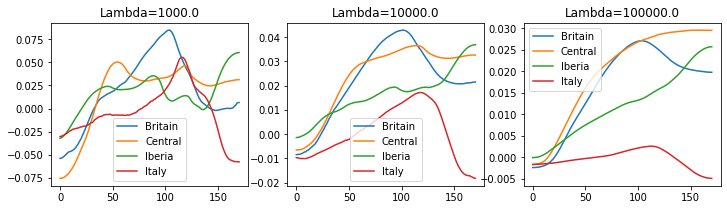

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))
lmbs=[1e3, 1e4, 1e5]

for j,lmb in enumerate(lmbs):
    results=[infer.fit_full(x[0], x[1], lmb, Ne=1000, D=100) for x in obs]
    for i,res in enumerate(results):
        x=np.arange(len(res["x"]))
        axs[j].plot(x, res["x"], label=pops[i])
    axs[j].legend()
    axs[j].title.set_text("Lambda="+str(lmb))

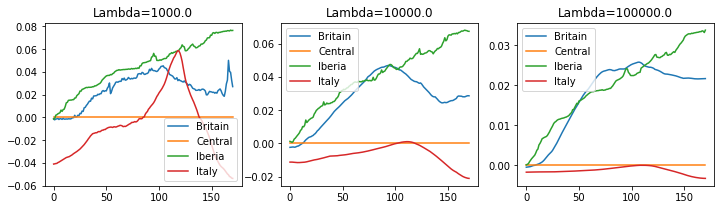

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))
lmbs=[1e3, 1e4, 1e5]

for j,lmb in enumerate(lmbs):
    results=[infer.fit_full(x[0], x[1], lmb, Ne=10000, D=100) for x in obs]
    for i,res in enumerate(results):
        x=np.arange(len(res["x"]))
        axs[j].plot(x, res["x"], label=pops[i])
    axs[j].legend()
    axs[j].title.set_text("Lambda="+str(lmb))